# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import datasets

In [18]:
mydata=pd.read_csv('Classified Data')
mydata.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [20]:
scaler.fit(mydata.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(mydata.drop('TARGET CLASS',axis=1))
print(scaler.fit(mydata))
scaled_features

StandardScaler()


array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [21]:
mydata.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [22]:
mydf_feat = pd.DataFrame(scaled_features,columns=mydata.columns[:-1])
mydf_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [23]:
print(mydata.columns)

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')


### Train/Test split, model fit and prediction

In [24]:
from sklearn.model_selection import train_test_split
#features
X = mydf_feat
#label
y = mydata['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,mydata['TARGET CLASS'],test_size=0.50, random_state=101)
X_train

array([[-0.83311685, -1.82974442,  0.3991411 , ..., -1.11885637,
        -0.48133885,  0.90673358],
       [ 1.27652208, -1.66749486,  1.04897187, ...,  0.75869726,
        -2.51009146, -0.76671409],
       [-0.58023731,  1.26967209, -1.61932029, ...,  0.62845654,
         0.10403866, -0.26513387],
       ...,
       [-0.56291679,  1.26036459, -0.87101478, ..., -1.27692778,
         1.32459392, -1.76962923],
       [ 0.08140643, -1.2920726 ,  0.93294128, ..., -1.17927185,
        -0.23060252, -0.9477175 ],
       [ 1.25920157, -1.28849983, -0.76807534, ..., -0.06174055,
        -0.77447506, -0.0498357 ]])

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=2)

In [26]:
# Predict on model has not seen before
#pred = knn.predict(X_test)
pred = knn.predict(X_test)
#print(pred.shape)
#pred


In [27]:
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred))

0.902
Accuracy: 0.902


### Evaluation of classification quality using Confusion Matrix

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,  pred))
print(classification_report(y_test,  pred))

[[242   8]
 [ 41 209]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       250
           1       0.96      0.84      0.90       250

    accuracy                           0.90       500
   macro avg       0.91      0.90      0.90       500
weighted avg       0.91      0.90      0.90       500



***Print Misclassification error rate***

In [29]:
misclassification_error_rate=np.mean( pred!= y_test)
print(misclassification_error_rate)

0.098


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [30]:

#In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

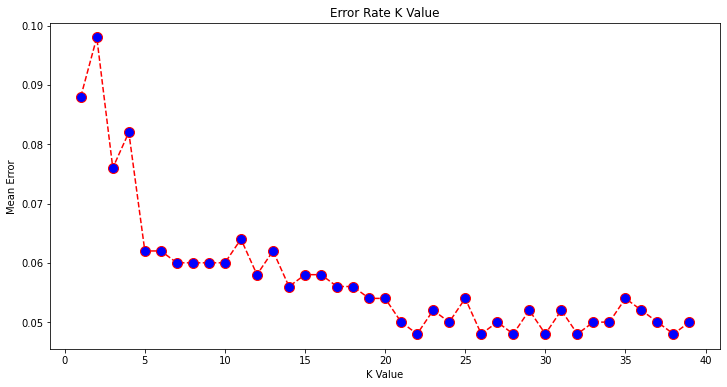

In [31]:
#plot the error values versus K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')